In [2]:
import pandas as pd

# Load the CSV file (replace 'your_file.csv' with the actual filename)
file_path = "D:\Brain_siez_det\CSV_Output\eeg1.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

# Check basic info (data types, missing values, etc.)
print(df.info())


       time  EEG Fp1-REF  EEG Fp2-REF  EEG F3-REF  EEG F4-REF  EEG C3-REF  \
0  0.000000     0.003500     0.003500    0.003500    0.003500    0.003500   
1  0.003906     0.003500     0.003500    0.003500    0.003500    0.003500   
2  0.007812     0.003500    -0.454263    0.308676   -0.301676    0.613851   
3  0.011719    -0.454263    -1.369790    0.613851   -0.759439    1.681965   
4  0.015625    -1.522378    -2.437904    0.766439   -1.217202    2.292317   

   EEG C4-REF  EEG P3-REF  EEG P4-REF  EEG O1-REF  ...  EEG F8-REF  \
0    0.003500    0.003500    0.003500    0.003500  ...    0.003500   
1    0.003500    0.308676    0.003500    0.156088  ...   -0.149088   
2   -0.149088    1.834553   -0.149088    0.613851  ...   -1.064614   
3   -0.301676    4.123370   -0.454263    1.071614  ...   -2.437904   
4   -0.454263    4.581133   -0.606851    1.071614  ...   -3.200843   

   EEG T3-REF  EEG T4-REF  EEG T5-REF  EEG T6-REF  EEG Fz-REF  EEG Cz-REF  \
0    0.003500    0.003500    0.003500  

In [3]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

# Check total missing values
total_missing = missing_values.sum()
print("\nTotal missing values:", total_missing)


Missing values per column:
 time               0
EEG Fp1-REF        0
EEG Fp2-REF        0
EEG F3-REF         0
EEG F4-REF         0
EEG C3-REF         0
EEG C4-REF         0
EEG P3-REF         0
EEG P4-REF         0
EEG O1-REF         0
EEG O2-REF         0
EEG F7-REF         0
EEG F8-REF         0
EEG T3-REF         0
EEG T4-REF         0
EEG T5-REF         0
EEG T6-REF         0
EEG Fz-REF         0
EEG Cz-REF         0
EEG Pz-REF         0
ECG EKG-REF        0
Resp Effort-REF    0
dtype: int64

Total missing values: 0


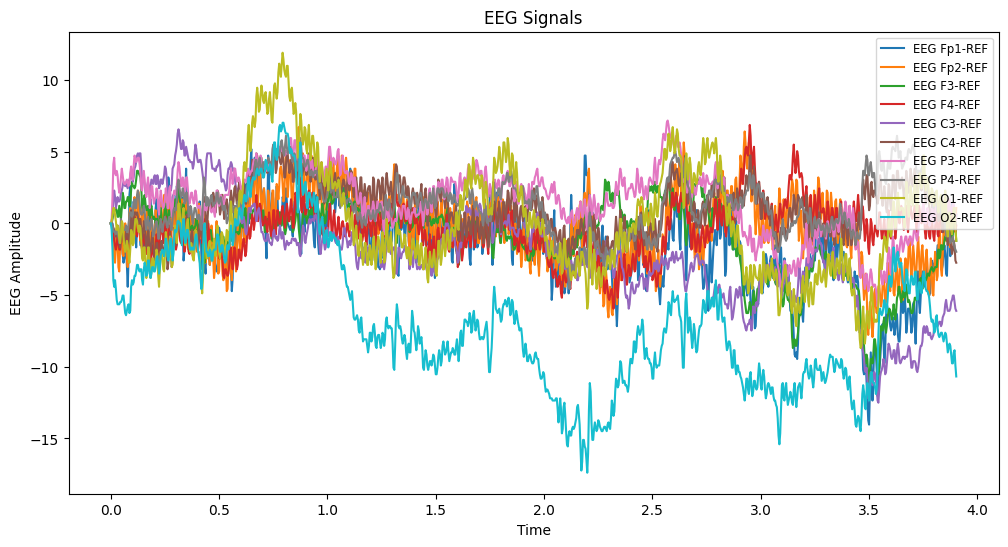

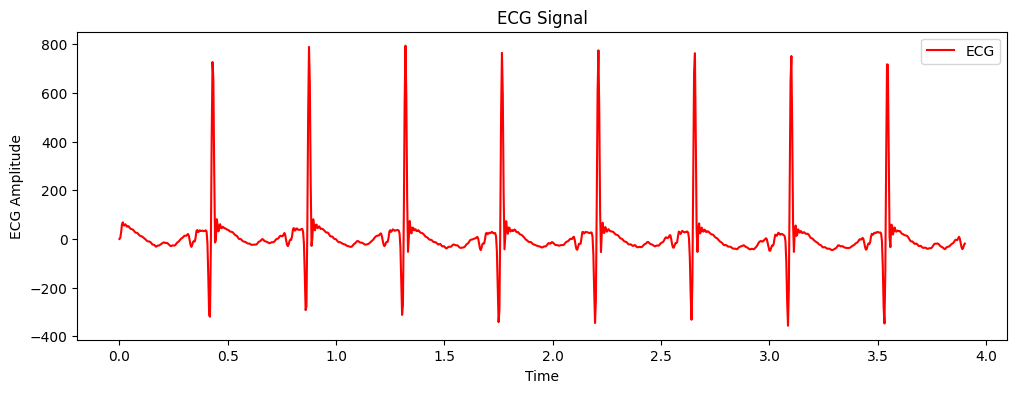

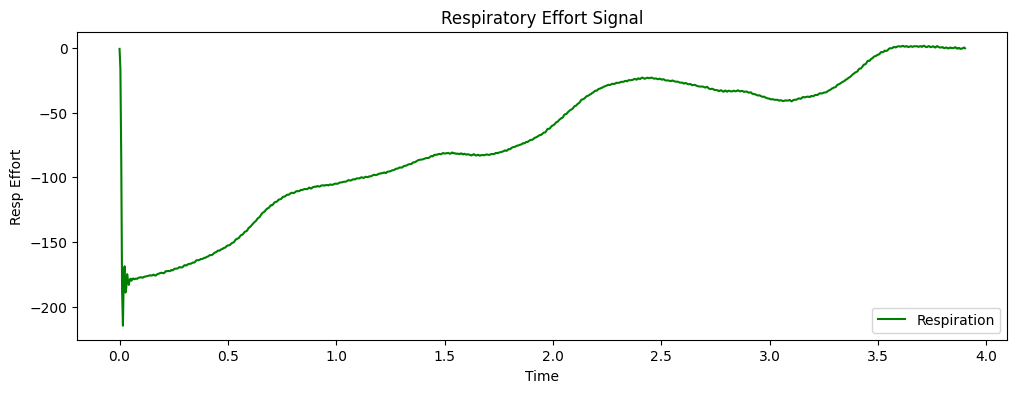

In [4]:
import matplotlib.pyplot as plt

# Select a time window for plotting (e.g., first 1000 samples)
time_window = 1000  

# Plot EEG signals
plt.figure(figsize=(12, 6))
for col in df.columns[1:11]:  # First 10 EEG channels
    plt.plot(df["time"][:time_window], df[col][:time_window], label=col)
plt.xlabel("Time")
plt.ylabel("EEG Amplitude")
plt.title("EEG Signals")
plt.legend(loc="upper right", fontsize="small")
plt.show()

# Plot ECG signal
plt.figure(figsize=(12, 4))
plt.plot(df["time"][:time_window], df["ECG EKG-REF"][:time_window], color="red", label="ECG")
plt.xlabel("Time")
plt.ylabel("ECG Amplitude")
plt.title("ECG Signal")
plt.legend()
plt.show()

# Plot Respiration signal
plt.figure(figsize=(12, 4))
plt.plot(df["time"][:time_window], df["Resp Effort-REF"][:time_window], color="green", label="Respiration")
plt.xlabel("Time")
plt.ylabel("Resp Effort")
plt.title("Respiratory Effort Signal")
plt.legend()
plt.show()


In [5]:
from scipy.signal import butter, filtfilt

# Function to apply bandpass filter
def bandpass_filter(data, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype="band")
    return filtfilt(b, a, data)

# Function to apply lowpass filter
def lowpass_filter(data, cutoff, fs, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype="low")
    return filtfilt(b, a, data)

# Sampling frequency (estimate from time column)
fs = 1 / (df["time"][1] - df["time"][0])  # Assuming uniform time steps

# Apply filters
for col in df.columns[1:20]:  # EEG and ECG channels
    df[col] = bandpass_filter(df[col], lowcut=0.5, highcut=50, fs=fs)

df["ECG EKG-REF"] = bandpass_filter(df["ECG EKG-REF"], lowcut=0.5, highcut=100, fs=fs)
df["Resp Effort-REF"] = lowpass_filter(df["Resp Effort-REF"], cutoff=1, fs=fs)

print("Filtering complete!")


Filtering complete!
